## VarQite tutorial

In [1]:
import Variational as var
import Hamiltonian as ham
from qiskit.circuit.library import EfficientSU2
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector,state_fidelity


In [2]:
#initialize parameters and Hamiltonian
N = 8
dt = 0.25
n_qubits= 8 
J,h = 1,1
H_pauli = ham.TFIM_Pauli(J,h,n_qubits)

In [ ]:
#Find the ground state of the Hamiltonian
EH,psiH=np.linalg.eigh(H_pauli.to_matrix())
E_gs=EH[0]
psi_gs=psiH[:,0]

In [4]:
#circuit for vanilla varqite
circuit_ansatz = EfficientSU2(n_qubits, reps=2, entanglement='linear',skip_final_rotation_layer=True)

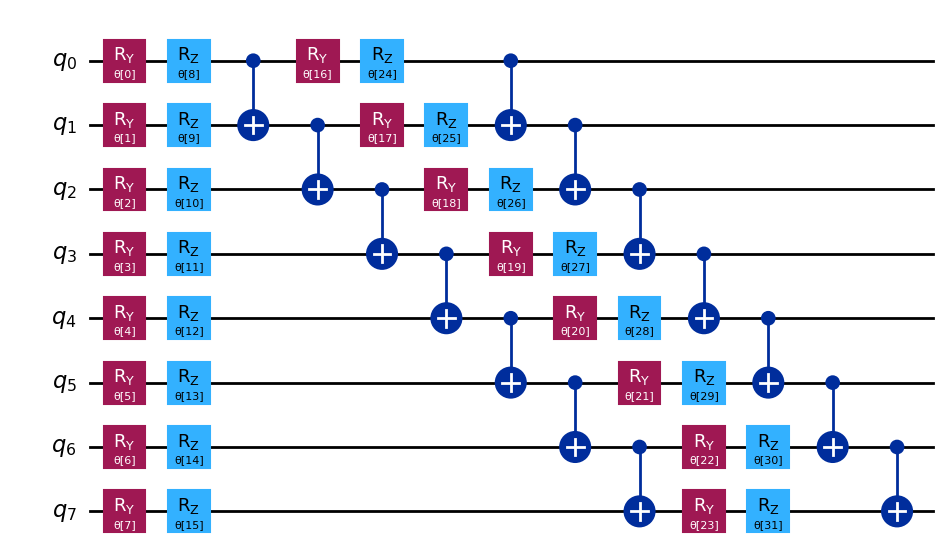

In [5]:
circuit_ansatz.decompose().draw('mpl')

In [6]:
# run the variational QITE using the Variational module
initial_parameters = np.random.uniform(0, 2 * np.pi,size=len(circuit_ansatz.parameters)) #random parameters angles
evolution_result = var.var_qite(H_pauli,circuit_ansatz,initial_parameters,dt,N)


Time vs. Energy Evolution:
Time: 0.000, Energy: -0.107432
Time: 0.250, Energy: -2.383258
Time: 0.500, Energy: -4.643502
Time: 0.750, Energy: -6.935833
Time: 1.000, Energy: -8.593327
Time: 1.250, Energy: -9.310390
Time: 1.500, Energy: -9.702564
Time: 1.750, Energy: -9.770599
Time: 2.000, Energy: -9.793336

Exact Ground State Energy: -10.251662


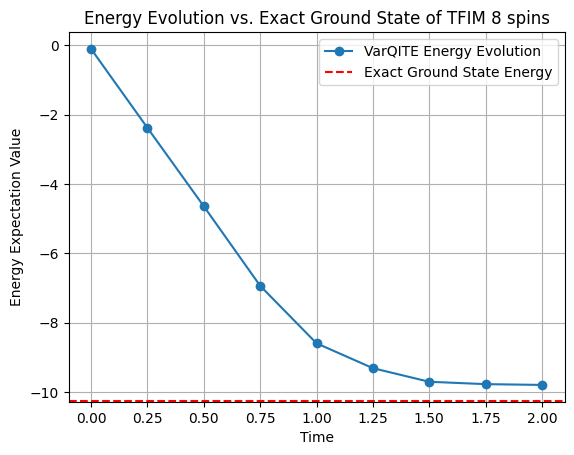

In [7]:
# Extract times and energy values from VarQITE evolution result
times = evolution_result.times
energies = [obs[0][0] for obs in evolution_result.observables]  # Extract energy expectation values

print("\nTime vs. Energy Evolution:")
for t, E in zip(times, energies):
    print(f"Time: {t:.3f}, Energy: {E:.6f}")

print(f"\nExact Ground State Energy: {E_gs:.6f}")

# Plot 
plt.plot(times, energies, marker='o', linestyle='-', label="VarQITE Energy Evolution")
plt.axhline(y=E_gs, color='r', linestyle='--', label="Exact Ground State Energy")  # Add horizontal line
plt.xlabel("Time")
plt.ylabel("Energy Expectation Value")
plt.title(f"Energy Evolution vs. Exact Ground State of TFIM {n_qubits} spins")
plt.legend()
plt.grid(True)
#plt.savefig(f'Energy Evolution vs. Exact Ground State of Glauber Ising Model {n_qubits} spins varqite.png', dpi=300)
plt.show()

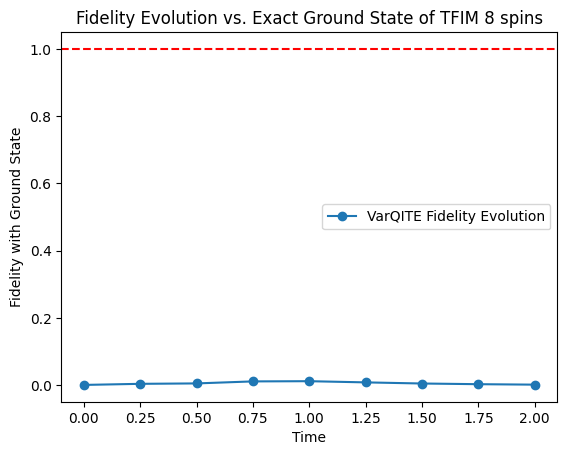

In [16]:
#plot fidelity
intermediate_fidelities = []
for values in evolution_result.parameter_values:
    state = Statevector(circuit_ansatz.assign_parameters(values))
    intermediate_fidelities.append(state_fidelity(state,psiH[:,0]))


plt.plot(times, intermediate_fidelities, marker='o', linestyle='-', label="VarQITE Fidelity Evolution")
plt.xlabel("Time")
plt.ylabel("Fidelity with Ground State")
plt.title(f"Fidelity Evolution vs. Exact Ground State of TFIM {n_qubits} spins")
plt.axhline(y=1, color='r', linestyle='--')  # Add horizontal line
plt.legend()
